In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt, matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')

# Climate footprint of NBIS retreats

## Travel

**References**

Emission data for different travel types are taken from [NTM](https://www.transportmeasures.org/sv/) which is the same resource used by Trafikverket. For train emissions the value for an average train using green electricity is used. For bus/car the values for an average vehicle of that type is used.

In [2]:
# Emission per person kilometer (pkm)
pkm_emissions = {'Bus': 0.08, 'Train': 0.00072, 'Car': 0.19, 'Air': 0.24}

The data on transport type and distance was taken from the registration responses and calculated roughly using Google Maps. For people travelling by train to Gnesta station it is assumed that they travel by bus the final stretch to the retreat.

In [3]:
travel_data = pd.read_csv("travel.tsv", header=0, sep="\t")
# For each person going by train, add the final stretch by bus (4 km)
_ = pd.DataFrame(data={'Travel type': ['Bus']*len(travel_data.loc[travel_data["Travel type"]=="Train"]),
                   'Distance (km)': [4]*len(travel_data.loc[travel_data["Travel type"]=="Train"])})
travel_data = pd.concat([travel_data,_])
travel_data.reset_index(inplace=True)
travel_data.drop("index", inplace=True, axis=1)
travel_data.tail(5)

,Travel type,Distance (km)
79,Bus,4
80,Bus,4
81,Bus,4
82,Bus,4
83,Bus,4


### Actual emissions

In [4]:
# Merge travel data with emissions dictionary
travel_df = pd.merge(travel_data, pd.DataFrame(pkm_emissions, index=["CO2 (kg/pkm)"]).T, left_on="Travel type", right_index=True)
# Multiply distance with emissions per person km and multiply by 2 for round trip
travel_df = travel_df.assign(CO2_travel = travel_df["Distance (km)"]*travel_df["CO2 (kg/pkm)"]*2)
travel_df = travel_df.reset_index().drop("index", axis=1)

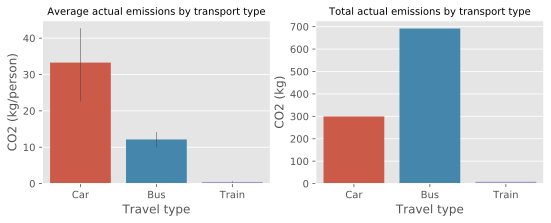

In [40]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(9,3))

ax1 = sns.barplot(data=travel_df, x="Travel type", y="CO2_travel", errwidth=.5, ax=axes[0], order=["Car","Bus","Train"])
ax1.set_ylabel("CO2 (kg/person)");
ax1.set_title("Average actual emissions by transport type", fontsize=10);

ax2 = sns.barplot(data=travel_df, x="Travel type", y="CO2_travel", ci=None, estimator=sum, ax=axes[1], order=["Car","Bus","Train"])
ax2.set_ylabel("CO2 (kg)");
ax2.set_title("Total actual emissions by transport type", fontsize=10);
plt.savefig("travel_emissions_by_type.png", dpi=300, bbox_inches="tight")

### Emission alternatives

#### Alternative 1
Let's say all people going by car would travel by train.

In [6]:
alt1 = travel_data.copy()
alt1.loc[alt1["Travel type"]=="Car","Travel type"] = "Train"
# Add the last 4 km
_ = pd.DataFrame(data={'Travel type': ['Bus']*len(travel_data.loc[travel_data["Travel type"]=="Car"]),
                   'Distance (km)': [4]*len(travel_data.loc[travel_data["Travel type"]=="Car"])})
alt1 = pd.concat([alt1, _])
alt1 = alt1.reset_index().drop("index", axis=1)

alt1_traveldf = pd.merge(alt1, pd.DataFrame(pkm_emissions, index=["CO2 (kg/pkm)"]).T, left_on="Travel type", right_index=True)
# Multiply distance with emissions per person km and multiply by 2 for round trip
alt1_traveldf = alt1_traveldf.assign(CO2_travel = alt1_traveldf["Distance (km)"]*alt1_traveldf["CO2 (kg/pkm)"]*2)
alt1_traveldf = alt1_traveldf.reset_index().drop("index", axis=1)

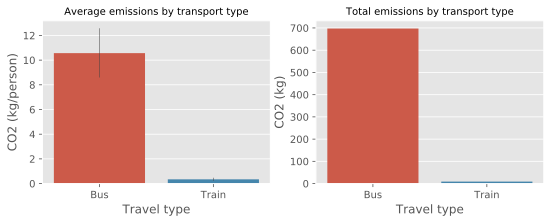

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(9,3))

ax1 = sns.barplot(data=alt1_traveldf, x="Travel type", y="CO2_travel", errwidth=.5, ax=axes[0])
ax1.set_ylabel("CO2 (kg/person)");
ax1.set_title("Average emissions by transport type", fontsize=10);

ax2 = sns.barplot(data=alt1_traveldf, x="Travel type", y="CO2_travel", ci=None, estimator=sum, ax=axes[1])
ax2.set_ylabel("CO2 (kg)");
ax2.set_title("Total emissions by transport type", fontsize=10);

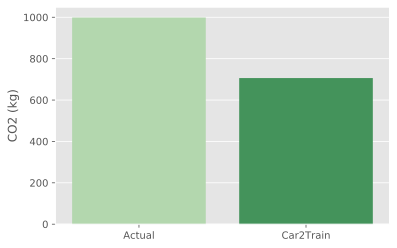

In [8]:
data={'Actual': travel_df.CO2_travel.sum(), 'Car2Train': alt1_traveldf.CO2_travel.sum()}
ax = sns.barplot(x=["Actual","Car2Train"], y=[data[key] for key in ["Actual","Car2Train"]], palette=sns.color_palette("Greens",len(data.keys())))
ax.set_ylabel("CO2 (kg)");

#### Alternative 2
Let's say all people going by car would take the bus

In [9]:
alt2 = travel_data.copy()
alt2.loc[alt2["Travel type"]=="Car","Travel type"] = "Bus"

alt2_traveldf = pd.merge(alt2, pd.DataFrame(pkm_emissions, index=["CO2 (kg/pkm)"]).T, left_on="Travel type", right_index=True)
# Multiply distance with emissions per person km and multiply by 2 for round trip
alt2_traveldf = alt2_traveldf.assign(CO2_travel = alt2_traveldf["Distance (km)"]*alt2_traveldf["CO2 (kg/pkm)"]*2)
alt2_traveldf = alt2_traveldf.reset_index().drop("index", axis=1)

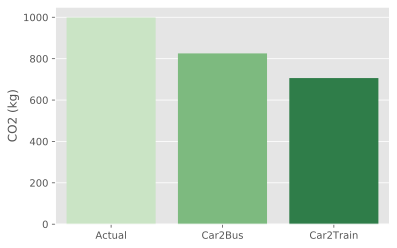

In [10]:
data={'Actual': travel_df.CO2_travel.sum(), 
      'Car2Train': alt1_traveldf.CO2_travel.sum(),
      'Car2Bus': alt2_traveldf.CO2_travel.sum()}
ax = sns.barplot(x=["Actual","Car2Bus","Car2Train"], y=[data[key] for key in ["Actual","Car2Bus","Car2Train"]], palette=sns.color_palette("Greens",len(data.keys())))
ax.set_ylabel("CO2 (kg)");

**Alternative 3**

Everyone takes the train

In [27]:
alt3 = travel_data.copy()
alt3.loc[alt3["Travel type"]=="Car","Travel type"] = "Train"
alt3.loc[alt3["Travel type"]=="Bus","Travel type"] = "Train"

alt3_traveldf = pd.merge(alt3, pd.DataFrame(pkm_emissions, index=["CO2 (kg/pkm)"]).T, left_on="Travel type", right_index=True)
# Multiply distance with emissions per person km and multiply by 2 for round trip
alt3_traveldf = alt3_traveldf.assign(CO2_travel = alt3_traveldf["Distance (km)"]*alt3_traveldf["CO2 (kg/pkm)"]*2)
alt3_traveldf = alt3_traveldf.reset_index().drop("index", axis=1)

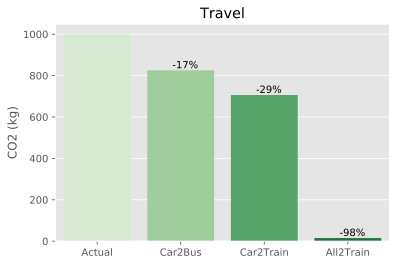

In [37]:
data={'Actual': travel_df.CO2_travel.sum(), 
      'Car2Train': alt1_traveldf.CO2_travel.sum(),
      'Car2Bus': alt2_traveldf.CO2_travel.sum(),
      'All2Train': alt3_traveldf.CO2_travel.sum()}
reductions = [int((data["Actual"]-data[x])/float(data["Actual"])*100) for x in ["Car2Bus","Car2Train","All2Train"]]
ax = sns.barplot(x=["Actual","Car2Bus","Car2Train","All2Train"], y=[data[key] for key in ["Actual","Car2Bus","Car2Train","All2Train"]], palette=sns.color_palette("Greens",len(data.keys())))
ax.set_title("Travel")
ax.set_ylabel("CO2 (kg)");
for i, key in enumerate(["Car2Bus","Car2Train","All2Train"], start=1):
    ax.text(i-0.1, data[key]+10, "-{}%".format(reductions[i-1]))
plt.savefig("travel_alternatives.png", dpi=300, bbox_inches="tight")

## Food

**References**

CO2 emissions per foodstuff was taken from [Roos, Elin (2014). Mat-klimat-listan. SLU, Uppsala](https://pub.epsilon.slu.se/11671/7/roos_e_141125.pdf). To account for typically locally produced foods the minimum value in the reported variation was used, except for tomatoes where the mean was used.

Servings were estimated from typical recipes.

Looking at the [menu](https://www.sodertuna.se/restaurang/menyer/) from the retreat venue 3 options are put together.

- Fish (locally produced pike-perch, yellow beets, potatoes, salad)
- Meat (swedish tenderloin, potatoes, tomatoes)
- Vegetarian/Vegan (vegan recipe of Gobi Motor using potatoes, peas and cauliflower)

### Recipes

In [11]:
recipes = {'meat': ['potatoes', 'tenderloin', 'tomatoes'],
           'fish': ['pike', 'beets', 'potatoes'],
           'vegetarian': ['potatoes', 'peas', 'cauliflower']}

### Servings

In [12]:
# weight per serving (kg)
food_servings = {'potatoes': 0.25,'tenderloin': 0.100, 
                 'beets': 0.25, 'pike': 0.15, 'peas': 0.2, 'cauliflower': 0.25,
                 'tomatoes': 0.1}

### Foodstuff emissions

In [13]:
# CO2 emissions per kg
food_emissions = {'potatoes': 0.1, 'tenderloin': 17, 'beets': 0.1, 'pike': 0.7, 
                  'peas': 0.2, 'cauliflower': 0.1, 'tomatoes': 1.4}

In [14]:
def recipe_co2(recipe, servings, emissions):
    co2 = 0
    for f in recipe:
        co2+=servings[f]*emissions[f]
    return co2

### Food preferences

We assume that people answering 'Other' fall into the 'Meat/Fish' category. Then we put 50% into Fish and 50% into Meat.

In [15]:
def read_food(f):
    foods = []
    with open(f, 'r') as fhin:
        for line in fhin:
            foods.append(line.rstrip())
    return foods
foods = pd.Series(read_food("food.tsv"))
foods.loc[foods=="Other"] = "Meat/Fish"
foods[0:int(foods.loc[foods=="Meat/Fish"].shape[0]/2)] = "fish"
foods.loc[foods=="Meat/Fish"] = "meat"
foods.loc[foods.str.contains("Vegetarian")] = "vegetarian"

In [16]:
food_co2 = pd.DataFrame({'CO2': [recipe_co2(recipes[preference], food_servings, food_emissions) for preference in foods],
            'food': [preference for preference in foods]})
food_co2.groupby("food").first()

,CO2
food,
fish,0.155
meat,1.865
vegetarian,0.090


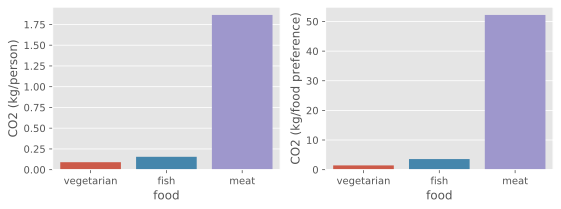

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(9,3))

ax1 = sns.barplot(data=food_co2, x="food", y="CO2", ci=None, order=["vegetarian","fish","meat"], ax=axes[0])
ax1.set_ylabel("CO2 (kg/person)")

ax2 = sns.barplot(data=food_co2, x="food", y="CO2", estimator=sum, ci=None, order=["vegetarian","fish","meat"], ax=axes[1])
ax2.set_ylabel("CO2 (kg/food preference)");

### Food alternatives

**Alt1**: Let's switch all meat eaters to fish.

In [18]:
foods_meat_to_fish = foods.copy()
foods_meat_to_fish.loc[foods_meat_to_fish=="meat"] = "fish"

In [19]:
food_co2_m2f = pd.DataFrame({'CO2': [recipe_co2(recipes[preference], food_servings, food_emissions) for preference in foods_meat_to_fish],
            'food': [preference for preference in foods_meat_to_fish]})

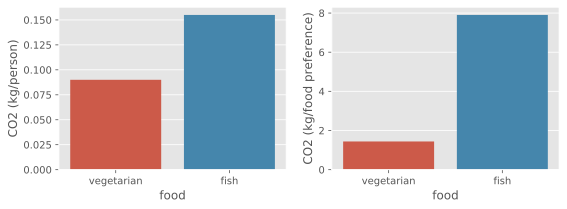

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(9,3))

ax1 = sns.barplot(data=food_co2_m2f, x="food", y="CO2", ci=None, order=["vegetarian","fish"], ax=axes[0])
ax1.set_ylabel("CO2 (kg/person)")

ax2 = sns.barplot(data=food_co2_m2f, x="food", y="CO2", estimator=sum, ci=None, order=["vegetarian","fish"], ax=axes[1])
ax2.set_ylabel("CO2 (kg/food preference)");

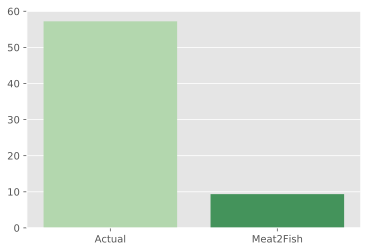

In [21]:
sns.barplot(x=["Actual","Meat2Fish"], y=[food_co2.CO2.sum(),food_co2_m2f.CO2.sum()], palette=sns.color_palette("Greens", 2))

**Alt2**: Let's switch everyone to vegetarian

In [22]:
foods_all_to_veg = foods.copy()
foods_all_to_veg.loc[foods_all_to_veg=="meat"] = "vegetarian"
foods_all_to_veg.loc[foods_all_to_veg=="fish"] = "vegetarian"

In [23]:
food_co2_a2v = pd.DataFrame({'CO2': [recipe_co2(recipes[preference], food_servings, food_emissions) for preference in foods_all_to_veg],
            'food': [preference for preference in foods_all_to_veg]})

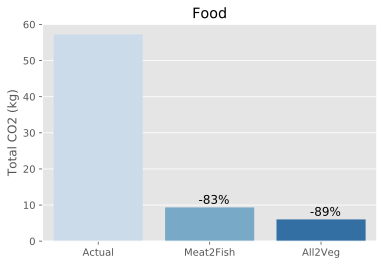

In [39]:
yvals = [food_co2.CO2.sum(),food_co2_m2f.CO2.sum(),food_co2_a2v.CO2.sum()]
reductions = [int((yvals[0]-yvals[1])/float(yvals[0])*100),
              int((yvals[0]-yvals[2])/float(yvals[0])*100)]
ax = sns.barplot(x=["Actual","Meat2Fish","All2Veg"], y=yvals, palette=sns.color_palette("Blues", 3))
ax.set_ylabel("Total CO2 (kg)");
ax.set_title("Food")
ax.text(0.9,yvals[1]+1,"-{}%".format(reductions[0]), fontsize=12);
ax.text(1.9,yvals[2]+1,"-{}%".format(reductions[1]), fontsize=12);
plt.savefig("food_alternatives.png", dpi=300, bbox_inches="tight")

## Total emissions

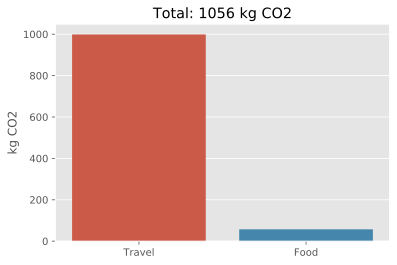

In [49]:
ax = sns.barplot(x=["Travel","Food"], y=[travel_df.CO2_travel.sum(),food_co2.CO2.sum()])
tot = int(sum([travel_df.CO2_travel.sum(),food_co2.CO2.sum()]))
ax.set_title("Total: {} kg CO2".format(tot))
ax.set_ylabel("kg CO2");
plt.savefig("total_CO2.png", dpi=300, bbox_inches="tight")